
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)



# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews



### Import Data

In [1]:
import pandas as pd

# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

raw = pd.read_json(data_url, lines=True)
print(list(raw.columns))

['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']


In [2]:
import re
import spacy
import numpy as np
# Download en_core_web_sm--suppress output--and load to nlp.

!python3 -m spacy download en_core_web_sm &>/dev/null
import en_core_web_sm
nlp = en_core_web_sm.load()

In [3]:
# Clean data
def bs_cleaner(raw_txt):
    """
    Remove unicode, ellipses and line return chars from text.
    Input: Uncouth string
    :Output: Couth string
    """
    text_raw = raw_txt
    # Remove ellipses, unicode (like \\x33 and \\xe3) and newline
    rm_txt_code = re.sub(r"\\\n", '', text_raw)
    rm_txt_code = re.sub(r"\\\\n", '', rm_txt_code)
    rm_txt_code = re.sub(r"\\\\[x][a-zA-Z0-9]{2}", '', rm_txt_code)
    rm_txt_code = re.sub('[^a-zA-Z 0-9]', '', rm_txt_code)
    return rm_txt_code.lower()

# Tokenize and remove stop words
def space_token(df, col):
    """
    From lecture (411) to make spacy tokens without stopwords.
    """
    df_cpy = df.copy()
    
    tokens = []
    for doc in nlp.pipe(df_cpy[col]):
        
        doc_tokens = []
        
        for token in doc:
            if (token.is_stop != True) and (token.is_punct != True):
                doc_tokens.append(token.lemma_)
        tokens.append(doc_tokens)
    df_cpy['tokens'] = tokens
    
    return df_cpy

In [4]:
# Apply functions to text and make new colmn
raw_cpy = raw.copy()
raw_cpy['clean_txt'] = raw_cpy['text'].apply(bs_cleaner)

ready_df = space_token(raw_cpy, 'clean_txt')

In [5]:
# Did this to pass visible testing as my df is refrenced differently.
df = raw_cpy.copy()

In [6]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [7]:
# Tokenization already happened BEFORE and under different column
# Copy here to pass vis checkpoint
# Still failing--proceeding anyways as the substance was captured before.
def tokenize(raw_txt):
    """
    Remove unicode, ellipses and line return chars from text.
    Input: Uncouth string
    :Output: Couth string
    """
    raw_0 = str(raw_txt)
    # Remove ellipses, unicode (like \\x33 and \\xe3) and newline
    rm_txt_code = re.sub(r"\\\n", '', raw_0)
    rm_txt_code = re.sub(r"\\\\n", '', rm_txt_code)
    rm_txt_code = re.sub(r"\\\\[x][a-zA-Z0-9]{2}", '', rm_txt_code)
    rm_txt_code = re.sub('[^a-zA-Z 0-9]', '', rm_txt_code)
    output = rm_txt_code.replace("\'", "")
    output =  output.lower().split(" ")
    return output

In [8]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, use `NearestNeighbors` model for this. 

In [9]:
# Create a vector representation of the reviews 
# Name that doc-term matrix "dtm"
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english", 
                       max_features=100)

dtm = vect.fit_transform(ready_df['text'])
# YOUR CODE HERE
# dtm = vect.transform(ready_df['text'])

In [10]:
# Create and fit a NearestNeighbors model named "nn"
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')
nn.fit(dtm)

/Users/danielfernandez/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_base.py:414: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [11]:
dtm = pd.DataFrame(data=dtm.toarray(), columns=vect.get_feature_names())
dtm.head(10)

,10,amazing,area,asked,awesome,bad,bar,best,better,bit,...,ve,vegas,wait,want,wanted,wasn,way,went,work,worth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,2,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
9,1,0,0,0,0,0,1,0,0,0,...,2,0,0,0,0,0,0,0,0,0


In [12]:
# Query NN using my review and show top-ten hits
query = dtm.iloc[42].values
query = np.array(query)
query = [query]
nn_dist, nn_index = nn.kneighbors(query)

print(f'Neighbor Distance = {nn_dist}\nNeighbor Index = {nn_index}')

Neighbor Distance = [[0.         3.16227766 3.16227766 3.16227766 3.31662479 3.31662479
  3.31662479 3.31662479 3.31662479 3.31662479]]
Neighbor Index = [[  42 3354 2724 8479 5991 1911 2133 6783 7550 9706]]


In [13]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to estimate a model to predict the `stars` feature (i.e. the labels). 
    - Use the Pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 to 3 possible values for each parameter
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Tune the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Name the gridsearch instance "gs"
tfidf = TfidfVectorizer(stop_words="english")
rfc = RandomForestClassifier()
pipe = Pipeline([("vect", tfidf),
                 ("clf", rfc)])
parameters = {
    # included parameters for the vectorizer
    "vect__max_df": (0.75, 1.0),   
    "clf__max_depth": (None, 10)   
}
gs = GridSearchCV(pipe,
                 parameters, 
                 cv=3,
                 n_jobs=1,
                 verbose=1)

# YOUR CODE HERE
X = ready_df['clean_txt']
Y = ready_df['stars']

gs.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   46.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [15]:
# Visible Testing
prediction = gs.predict(["I wish dogs knew how to speak English."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you construct your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [16]:
from gensim import corpora
# Due to limited computational resources on CodeGrader, use the non-multicore version of LDA 
from gensim.models.ldamodel import LdaModel
import gensim
import re

### 1. Estimate a LDA topic model of the review tex

In [17]:
# Configure inputs to LDA and set topic number
id2word = corpora.Dictionary(ready_df['tokens'])
corpus = [id2word.doc2bow(list_of_token) for list_of_token in ready_df['tokens']]
num_topics = 5

lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics=num_topics,
               passes=1
              )

#### Testing

In [18]:
# Visible Testing
assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 1-2 visualizations of the results

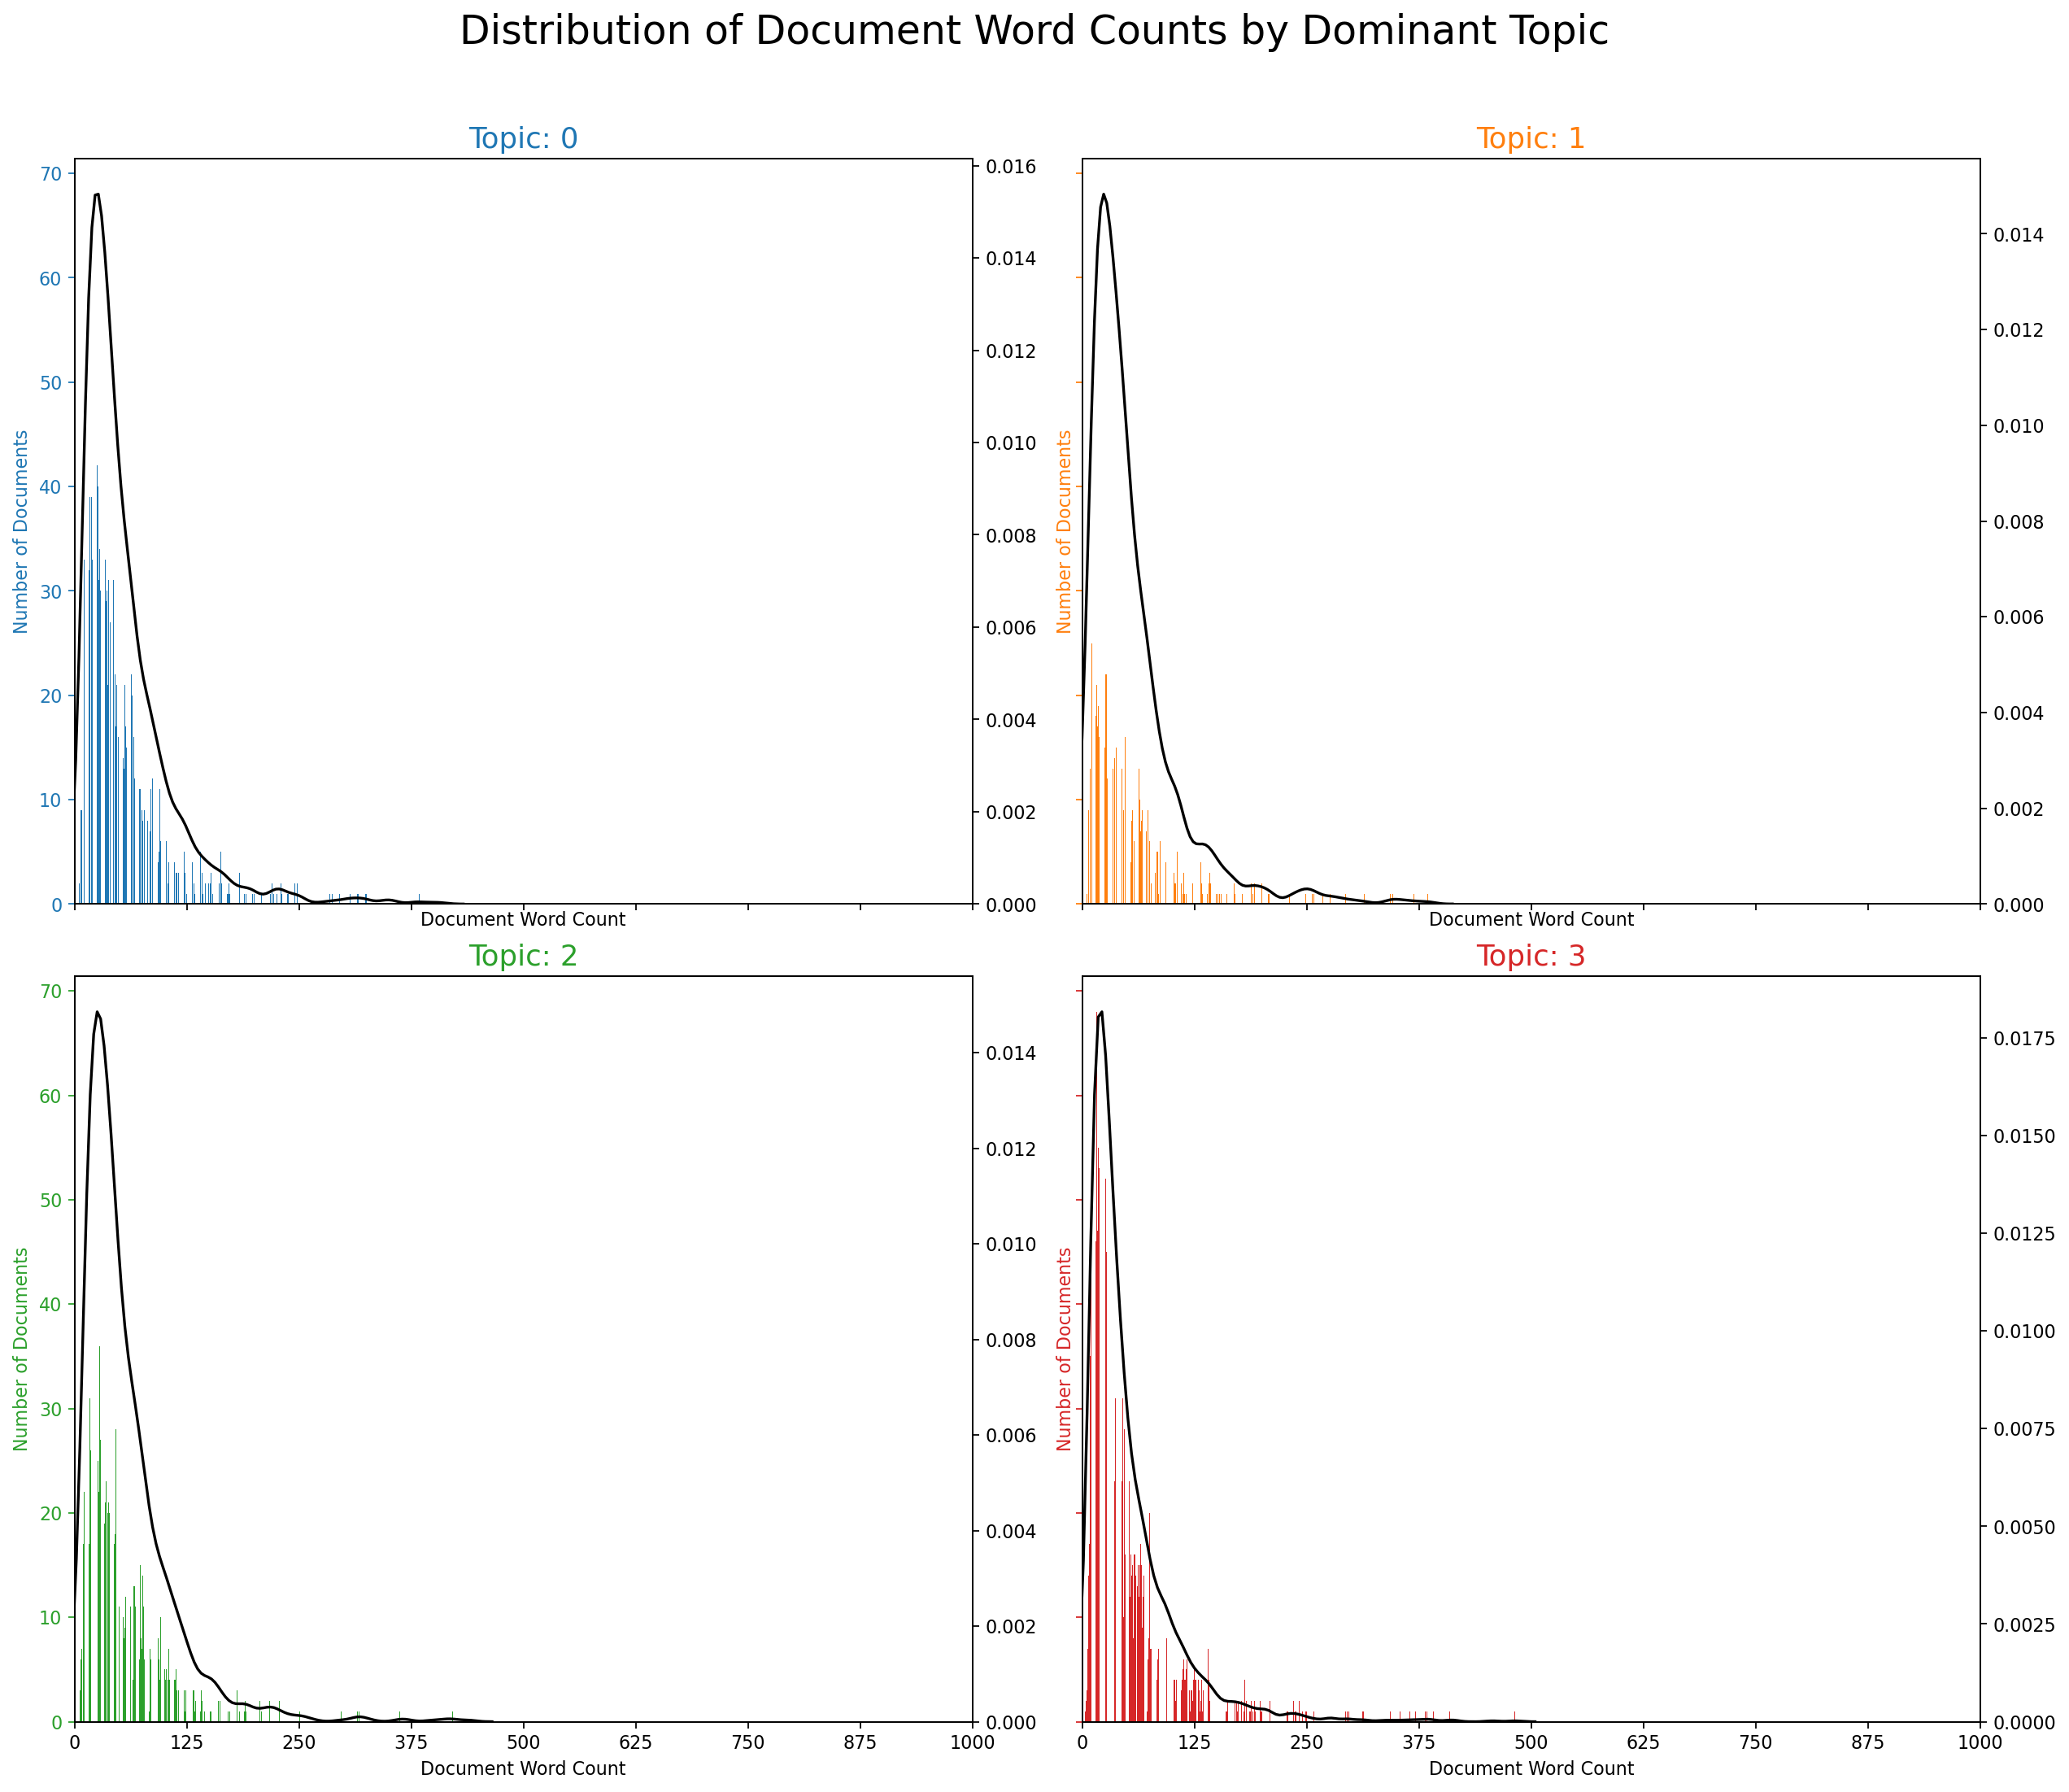

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Format metrics
def format_topics_sentences(texts, ldamodel=None, corpus=corpus):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=ready_df['tokens'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)



cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

#### 3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

The graph above shows the document word count related to topics and the black line represents the density estimate related to document length. Topic 0, the most prevalent topic in the data set, shows that the majority of documents carry flagging--of topic--words that are linked to that topic. While Toipc 3 may look to exceed that bound, the flagged words are focoused in specific documents; possibly representing a sparse sampling of that data with dense flagging words in the dataset.

Further interrogating Topic 3, the majority of the documents related to that topic show a large word count on average when compared to other topics. In many instances, the number of words in those documents exceeds the average. Important to further examine the input data to ensure a more stratified feeding to ensure the model was not overfit to a specific topic.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)